Vamos a realizar la extracción de los datos desde la API de ENACOM en formato csv para luego realizar su posterior procesamiento.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

: 

**Analisis de recomendación de inversión en equipos de acceso a internet de Alta velocidad**

In [35]:
#Acceso a internet fijo x velocidad x localidad
#obtener los datos en formato csv conectividad al servicio de internet
url='http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-16249/data.csv/i87PWkOC339ybbxZ51rzvGzyBHnqDBetw9Walakn'
response=requests.get(url)
if response.status_code == 200:
    with open('./Datasets/AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171689273280007.csv', 'wb') as file:
        file.write(response.content)
        print('Archivo guardado exitosamente.')
else:
    print(response.status_code)



404


In [4]:
# Cargar el archivo CSV en un DataFrame
df_acceso_internet_Velocidad_Localidad = pd.read_csv('./Datasets/AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171689273280007.csv',  encoding='utf-8')


In [5]:
#inspeccionamos el df
df_acceso_internet_Velocidad_Localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

In [6]:
df_acceso_internet_Velocidad_Localidad.head(5)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_acceso_internet_Velocidad_Localidad.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       '0,256 mbps', '0,375 mbps', '0,5 mbps', '0,512 mbps', '0,625 mbps',
       '0,75 mbps', '1 mbps', '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps',
       '2,5 mbps', '3 mbps', '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps',
       '5 mbps', '6 mbps', '6,4 mbps', '7 mbps', '7,5 mbps', '8 mbps',
       '9 mbps', '10 mbps', '11 mbps', '12 mbps', '13 mbps', '14 mbps',
       '15 mbps', '16 mbps', '17 mbps', '18 mbps', '19 mbps', '20 mbps',
       '21 mbps', '22 mbps', '23 mbps', '24 mbps', '25 mbps', '25,1 mbps',
       '25,11 mbps', '25,5 mbps', '26 mbps', '30 mbps', '31 mbps', '32 mbps',
       '34 mbps', '35 mbps', '36 mbps', '38 mbps', '39 mbps', '40 mbps',
       '41 mbps', '45 mbps', '46 mbps', '49 mbps', '50 mbps', '55 mbps',
       '58 mbps', '59 mbps', '60 mbps', '61 mbps', '62 mbps', '64 mbps',
       '65 mbps', '66 mbps', '70 mbps', '75 mbps', '78 mbps', '80 mbps',
       '82 mbps', '83 mbps', '85 mbps', '90 m

In [8]:
df_acceso_internet_Velocidad_Localidad.rename(columns={'Link Indec': 'link'}, inplace=True)

In [9]:
df_acceso_internet_Velocidad_Localidad.shape

(3098, 83)

In [10]:
df_acceso_internet_Velocidad_Localidad['Localidad'].count()

3098

Eliminamos columnas que no aportan al análisis, en este caso 'otras'

In [11]:
df_acceso_internet_Velocidad_Localidad.drop(columns='Otros', axis=0, inplace=True)

In [12]:
#chequeamos nulos en la columna link indec y eliminarlos
df_acceso_internet_Velocidad_Localidad['link'].isna().sum() 
df_acceso_internet_Velocidad_Localidad.dropna(subset=['link'], inplace=True)
df_acceso_internet_Velocidad_Localidad['link'].isna().sum() 

0

Eliminamos unas comillas que aparcen en algunos registros numericos.

In [13]:
# Eliminar las comillas en todo el DataFrame
df_acceso_internet_Velocidad_Localidad = df_acceso_internet_Velocidad_Localidad.apply(lambda x: x.str.replace('"', '') if x.dtype != 'float' else x)

In [14]:
# Eliminar las comas en todo el DataFrame
df_acceso_internet_Velocidad_Localidad = df_acceso_internet_Velocidad_Localidad.apply(lambda x: x.str.replace(',', '') if x.dtype != 'float' else x)

In [15]:
df_acceso_internet_Velocidad_Localidad.shape

(3098, 82)

Chequeamos nulos y los reeplazamos por 0 para luego poder hallar un total.

In [16]:
#Provincia', 'Partido', 'Localidad' No existen nulos en las 3 columnas de estudio.
df_acceso_internet_Velocidad_Localidad['Provincia'].isna().sum() 
#Se reeplazan nulos por 0 en las diferentes conectividades para hallar total por localidad
df_acceso_internet_Velocidad_Localidad['0,256 mbps'] = df_acceso_internet_Velocidad_Localidad['0,256 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['0,375 mbps'] = df_acceso_internet_Velocidad_Localidad['0,375 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['0,5 mbps'] = df_acceso_internet_Velocidad_Localidad['0,5 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['0,512 mbps'] = df_acceso_internet_Velocidad_Localidad['0,512 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['0,625 mbps'] = df_acceso_internet_Velocidad_Localidad['0,625 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['0,75 mbps'] = df_acceso_internet_Velocidad_Localidad['0,75 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['1 mbps'] = df_acceso_internet_Velocidad_Localidad['1 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['1,25 mbps'] = df_acceso_internet_Velocidad_Localidad['1,25 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['1,5 mbps'] = df_acceso_internet_Velocidad_Localidad['1,5 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['2 mbps'] = df_acceso_internet_Velocidad_Localidad['2 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['2,2 mbps'] = df_acceso_internet_Velocidad_Localidad['2,2 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['2,5 mbps'] = df_acceso_internet_Velocidad_Localidad['2,5 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['3 mbps'] = df_acceso_internet_Velocidad_Localidad['3 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['3,3 mbps'] = df_acceso_internet_Velocidad_Localidad['3,3 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['3,5 mbps'] = df_acceso_internet_Velocidad_Localidad['3,5 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['4 mbps'] = df_acceso_internet_Velocidad_Localidad['4 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['4,5 mbps'] = df_acceso_internet_Velocidad_Localidad['4,5 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['5 mbps'] = df_acceso_internet_Velocidad_Localidad['5 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['6 mbps'] = df_acceso_internet_Velocidad_Localidad['6 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['6,4 mbps'] = df_acceso_internet_Velocidad_Localidad['6,4 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['7 mbps'] = df_acceso_internet_Velocidad_Localidad['7 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['7,5 mbps'] = df_acceso_internet_Velocidad_Localidad['7,5 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['8 mbps'] = df_acceso_internet_Velocidad_Localidad['8 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['9 mbps'] = df_acceso_internet_Velocidad_Localidad['9 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['10 mbps'] = df_acceso_internet_Velocidad_Localidad['10 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['11 mbps'] = df_acceso_internet_Velocidad_Localidad['11 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['12 mbps'] = df_acceso_internet_Velocidad_Localidad['12 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['13 mbps'] = df_acceso_internet_Velocidad_Localidad['13 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['14 mbps'] = df_acceso_internet_Velocidad_Localidad['14 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['15 mbps'] = df_acceso_internet_Velocidad_Localidad['15 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['16 mbps'] = df_acceso_internet_Velocidad_Localidad['16 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['17 mbps'] = df_acceso_internet_Velocidad_Localidad['17 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['18 mbps'] = df_acceso_internet_Velocidad_Localidad['18 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['19 mbps'] = df_acceso_internet_Velocidad_Localidad['19 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['20 mbps'] = df_acceso_internet_Velocidad_Localidad['20 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['21 mbps'] = df_acceso_internet_Velocidad_Localidad['21 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['22 mbps'] = df_acceso_internet_Velocidad_Localidad['22 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['23 mbps'] = df_acceso_internet_Velocidad_Localidad['23 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['24 mbps'] = df_acceso_internet_Velocidad_Localidad['24 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['25 mbps'] = df_acceso_internet_Velocidad_Localidad['25 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['25,1 mbps'] = df_acceso_internet_Velocidad_Localidad['25,1 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['25,11 mbps'] = df_acceso_internet_Velocidad_Localidad['25,11 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['25,5 mbps'] = df_acceso_internet_Velocidad_Localidad['25,5 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['26 mbps'] = df_acceso_internet_Velocidad_Localidad['26 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['30 mbps'] = df_acceso_internet_Velocidad_Localidad['30 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['31 mbps'] = df_acceso_internet_Velocidad_Localidad['31 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['32 mbps'] = df_acceso_internet_Velocidad_Localidad['32 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['34 mbps'] = df_acceso_internet_Velocidad_Localidad['34 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['35 mbps'] = df_acceso_internet_Velocidad_Localidad['35 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['36 mbps'] = df_acceso_internet_Velocidad_Localidad['36 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['38 mbps'] = df_acceso_internet_Velocidad_Localidad['38 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['39 mbps'] = df_acceso_internet_Velocidad_Localidad['39 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['40 mbps'] = df_acceso_internet_Velocidad_Localidad['40 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['41 mbps'] = df_acceso_internet_Velocidad_Localidad['41 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['45 mbps'] = df_acceso_internet_Velocidad_Localidad['45 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['46 mbps'] = df_acceso_internet_Velocidad_Localidad['46 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['49 mbps'] = df_acceso_internet_Velocidad_Localidad['49 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['50 mbps'] = df_acceso_internet_Velocidad_Localidad['50 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['55 mbps'] = df_acceso_internet_Velocidad_Localidad['55 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['58 mbps'] = df_acceso_internet_Velocidad_Localidad['58 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['59 mbps'] = df_acceso_internet_Velocidad_Localidad['59 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['60 mbps'] = df_acceso_internet_Velocidad_Localidad['60 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['61 mbps'] = df_acceso_internet_Velocidad_Localidad['61 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['62 mbps'] = df_acceso_internet_Velocidad_Localidad['62 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['64 mbps'] = df_acceso_internet_Velocidad_Localidad['64 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['65 mbps'] = df_acceso_internet_Velocidad_Localidad['65 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['66 mbps'] = df_acceso_internet_Velocidad_Localidad['66 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['70 mbps'] = df_acceso_internet_Velocidad_Localidad['70 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['75 mbps'] = df_acceso_internet_Velocidad_Localidad['75 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['78 mbps'] = df_acceso_internet_Velocidad_Localidad['78 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['80 mbps'] = df_acceso_internet_Velocidad_Localidad['80 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['82 mbps'] = df_acceso_internet_Velocidad_Localidad['82 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['83 mbps'] = df_acceso_internet_Velocidad_Localidad['83 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['85 mbps'] = df_acceso_internet_Velocidad_Localidad['85 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['90 mbps'] = df_acceso_internet_Velocidad_Localidad['90 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['92 mbps'] = df_acceso_internet_Velocidad_Localidad['92 mbps'] .fillna(0)
df_acceso_internet_Velocidad_Localidad['95 mbps'] = df_acceso_internet_Velocidad_Localidad['95 mbps'].fillna(0)
df_acceso_internet_Velocidad_Localidad['100 mbps'] = df_acceso_internet_Velocidad_Localidad['100 mbps'].fillna(0)


In [17]:
#eliminamos registros donde la columna link es = 'Sin Datos'
df_acceso_internet_Velocidad_Localidad = df_acceso_internet_Velocidad_Localidad.drop(df_acceso_internet_Velocidad_Localidad[df_acceso_internet_Velocidad_Localidad['link'] == 'Sin Datos'].index)
df_acceso_internet_Velocidad_Localidad['link']

0        6854100
1        6854010
2        6854020
3        6854030
4        6854040
          ...   
3093    90105100
3094    90112020
3095    90112030
3096    90119020
3097    90119030
Name: link, Length: 3021, dtype: object

In [18]:
df_acceso_internet_Velocidad_Localidad.dtypes

Provincia      object
Partido        object
Localidad      object
link           object
0,256 mbps    float64
               ...   
85 mbps       float64
90 mbps       float64
92 mbps       float64
95 mbps       float64
100 mbps       object
Length: 82, dtype: object

In [19]:
#pasar todos a tipo int para luego hacer un total
df_acceso_internet_Velocidad_Localidad['0,256 mbps'] = df_acceso_internet_Velocidad_Localidad['0,256 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['0,375 mbps'] = df_acceso_internet_Velocidad_Localidad['0,375 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['0,5 mbps'] = df_acceso_internet_Velocidad_Localidad['0,5 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['0,512 mbps'] = df_acceso_internet_Velocidad_Localidad['0,512 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['0,625 mbps'] = df_acceso_internet_Velocidad_Localidad['0,625 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['0,75 mbps'] = df_acceso_internet_Velocidad_Localidad['0,75 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['1 mbps'] = df_acceso_internet_Velocidad_Localidad['1 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['1,25 mbps'] = df_acceso_internet_Velocidad_Localidad['1,25 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['1,5 mbps'] = df_acceso_internet_Velocidad_Localidad['1,5 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['2 mbps'] = df_acceso_internet_Velocidad_Localidad['2 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['2,2 mbps'] = df_acceso_internet_Velocidad_Localidad['2,2 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['2,5 mbps'] = df_acceso_internet_Velocidad_Localidad['2,5 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['3 mbps'] = df_acceso_internet_Velocidad_Localidad['3 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['3,3 mbps'] = df_acceso_internet_Velocidad_Localidad['3,3 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['3,5 mbps'] = df_acceso_internet_Velocidad_Localidad['3,5 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['4 mbps'] = df_acceso_internet_Velocidad_Localidad['4 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['4,5 mbps'] = df_acceso_internet_Velocidad_Localidad['4,5 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['5 mbps'] = df_acceso_internet_Velocidad_Localidad['5 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['6 mbps'] = df_acceso_internet_Velocidad_Localidad['6 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['6,4 mbps'] = df_acceso_internet_Velocidad_Localidad['6,4 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['7 mbps'] = df_acceso_internet_Velocidad_Localidad['7 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['7,5 mbps'] = df_acceso_internet_Velocidad_Localidad['7,5 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['8 mbps'] = df_acceso_internet_Velocidad_Localidad['8 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['9 mbps'] = df_acceso_internet_Velocidad_Localidad['9 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['10 mbps'] = df_acceso_internet_Velocidad_Localidad['10 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['11 mbps'] = df_acceso_internet_Velocidad_Localidad['11 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['12 mbps'] = df_acceso_internet_Velocidad_Localidad['12 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['13 mbps'] = df_acceso_internet_Velocidad_Localidad['13 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['14 mbps'] = df_acceso_internet_Velocidad_Localidad['14 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['15 mbps'] = df_acceso_internet_Velocidad_Localidad['15 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['16 mbps'] = df_acceso_internet_Velocidad_Localidad['16 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['17 mbps'] = df_acceso_internet_Velocidad_Localidad['17 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['18 mbps'] = df_acceso_internet_Velocidad_Localidad['18 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['19 mbps'] = df_acceso_internet_Velocidad_Localidad['19 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['20 mbps'] = df_acceso_internet_Velocidad_Localidad['20 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['21 mbps'] = df_acceso_internet_Velocidad_Localidad['21 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['22 mbps'] = df_acceso_internet_Velocidad_Localidad['22 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['23 mbps'] = df_acceso_internet_Velocidad_Localidad['23 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['24 mbps'] = df_acceso_internet_Velocidad_Localidad['24 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['25 mbps'] = df_acceso_internet_Velocidad_Localidad['25 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['25,1 mbps'] = df_acceso_internet_Velocidad_Localidad['25,1 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['25,11 mbps'] = df_acceso_internet_Velocidad_Localidad['25,11 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['25,5 mbps'] = df_acceso_internet_Velocidad_Localidad['25,5 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['26 mbps'] = df_acceso_internet_Velocidad_Localidad['26 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['30 mbps'] = df_acceso_internet_Velocidad_Localidad['30 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['31 mbps'] = df_acceso_internet_Velocidad_Localidad['31 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['32 mbps'] = df_acceso_internet_Velocidad_Localidad['32 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['34 mbps'] = df_acceso_internet_Velocidad_Localidad['34 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['35 mbps'] = df_acceso_internet_Velocidad_Localidad['35 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['36 mbps'] = df_acceso_internet_Velocidad_Localidad['36 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['38 mbps'] = df_acceso_internet_Velocidad_Localidad['38 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['39 mbps'] = df_acceso_internet_Velocidad_Localidad['39 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['40 mbps'] = df_acceso_internet_Velocidad_Localidad['40 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['41 mbps'] = df_acceso_internet_Velocidad_Localidad['41 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['45 mbps'] = df_acceso_internet_Velocidad_Localidad['45 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['46 mbps'] = df_acceso_internet_Velocidad_Localidad['46 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['49 mbps'] = df_acceso_internet_Velocidad_Localidad['49 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['50 mbps'] = df_acceso_internet_Velocidad_Localidad['50 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['55 mbps'] = df_acceso_internet_Velocidad_Localidad['55 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['58 mbps'] = df_acceso_internet_Velocidad_Localidad['58 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['59 mbps'] = df_acceso_internet_Velocidad_Localidad['59 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['60 mbps'] = df_acceso_internet_Velocidad_Localidad['60 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['61 mbps'] = df_acceso_internet_Velocidad_Localidad['61 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['62 mbps'] = df_acceso_internet_Velocidad_Localidad['62 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['64 mbps'] = df_acceso_internet_Velocidad_Localidad['64 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['65 mbps'] = df_acceso_internet_Velocidad_Localidad['65 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['66 mbps'] = df_acceso_internet_Velocidad_Localidad['66 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['70 mbps'] = df_acceso_internet_Velocidad_Localidad['70 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['75 mbps'] = df_acceso_internet_Velocidad_Localidad['75 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['78 mbps'] = df_acceso_internet_Velocidad_Localidad['78 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['80 mbps'] = df_acceso_internet_Velocidad_Localidad['80 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['82 mbps'] = df_acceso_internet_Velocidad_Localidad['82 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['83 mbps'] = df_acceso_internet_Velocidad_Localidad['83 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['85 mbps'] = df_acceso_internet_Velocidad_Localidad['85 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['90 mbps'] = df_acceso_internet_Velocidad_Localidad['90 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['92 mbps'] = df_acceso_internet_Velocidad_Localidad['92 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['95 mbps'] = df_acceso_internet_Velocidad_Localidad['95 mbps'].astype(int)
df_acceso_internet_Velocidad_Localidad['100 mbps'] = df_acceso_internet_Velocidad_Localidad['100 mbps'].astype(int)

In [20]:
df_acceso_internet_Velocidad_Localidad.dtypes

Provincia     object
Partido       object
Localidad     object
link          object
0,256 mbps     int32
               ...  
85 mbps        int32
90 mbps        int32
92 mbps        int32
95 mbps        int32
100 mbps       int32
Length: 82, dtype: object

In [21]:
df_acceso_internet_Velocidad_Localidad.head(100)

,Provincia,Partido,Localidad,link,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps","0,75 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,0,2,0,0,19,...,0,0,9,0,0,0,0,0,0,0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,BUENOS AIRES,Bolívar,Urdampilleta,6105070,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,BUENOS AIRES,Bragado,Bragado,6112010,0,0,0,0,0,15,...,0,0,0,0,0,0,0,0,0,1445
99,BUENOS AIRES,Bragado,Comodoro Py,6112020,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
100,BUENOS AIRES,Bragado,General O'Brien,6112030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Agregamos un columna con la sumatoria de las conexiones de cada localidad.

In [22]:
df_acceso_internet_Velocidad_Localidad['Total_Accesos'] = df_acceso_internet_Velocidad_Localidad.eval('`0,256 mbps` + `0,375 mbps` + `0,5 mbps` + `0,512 mbps` + `0,625 mbps` + `0,75 mbps` + `1 mbps` + `1,25 mbps` + `1,5 mbps` + `2 mbps` + `2,2 mbps` + `2,5 mbps` + `3 mbps` + `3,3 mbps` + `3,5 mbps` + `4 mbps` + `4,5 mbps` + `5 mbps` + `6 mbps` + `6,4 mbps` + `7 mbps` + `7,5 mbps` + `8 mbps` + `9 mbps` + `10 mbps` + `11 mbps` + `12 mbps` + `13 mbps` + `14 mbps` + `15 mbps` + `16 mbps` + `17 mbps` + `18 mbps` + `19 mbps` + `20 mbps` + `21 mbps` + `22 mbps` + `23 mbps` + `24 mbps` + `25 mbps` + `25,1 mbps` + `25,11 mbps` + `25,5 mbps` + `26 mbps` + `30 mbps` + `31 mbps` + `32 mbps` + `34 mbps` + `35 mbps` + `36 mbps` + `38 mbps` + `39 mbps` + `40 mbps` + `41 mbps` + `45 mbps` + `46 mbps` + `49 mbps` + `50 mbps` + `55 mbps` + `58 mbps` + `59 mbps` + `60 mbps` + `61 mbps` + `62 mbps` + `64 mbps` + `65 mbps` + `66 mbps` + `70 mbps` + `75 mbps` + `78 mbps` + `80 mbps` + `82 mbps` + `83 mbps` + `85 mbps` + `90 mbps` + `92 mbps` + `95 mbps` + `100 mbps`')
df_acceso_internet_Velocidad_Localidad

,Provincia,Partido,Localidad,link,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps","0,75 mbps",...,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps,Total_Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,0,2,0,0,19,...,0,9,0,0,0,0,0,0,0,6336
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,58
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,192
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,304,459
3094,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,313
3095,TUCUMAN,Trancas,Villa de Trancas,90112030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,282
3096,TUCUMAN,Yerba Buena,Villa Carmela,90119020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1823


C:\Users\caro\AppData\Local\Temp\ipykernel_16368\2625298129.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columnas_velocidad, rotation=45)


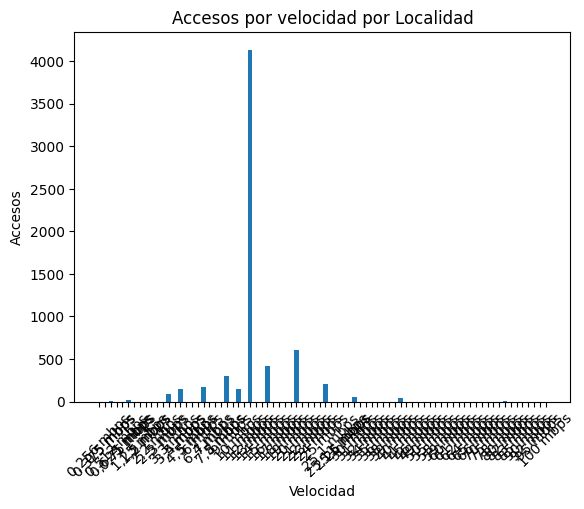

In [56]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Obtener los nombres de las columnas de velocidad
columnas_velocidad = df_acceso_internet_Velocidad_Localidad.columns[4:-1]

# Obtener los datos de accesos para cada velocidad en una localidad
datos_localidad = df_acceso_internet_Velocidad_Localidad.loc[df_acceso_internet_Velocidad_Localidad['Localidad'] == '25 de Mayo', columnas_velocidad].values[0]

# Crear el gráfico de barras
ax.bar(columnas_velocidad, datos_localidad)

# Establecer etiquetas y título
ax.set_xlabel('Velocidad')
ax.set_ylabel('Accesos')
ax.set_title('Accesos por velocidad por Localidad')

ax.set_xticklabels(columnas_velocidad, rotation=45)

# Mostrar el gráfico
plt.show()

In [23]:
df_acceso_internet_Velocidad_Localidad.columns

Index(['Provincia', 'Partido', 'Localidad', 'link', '0,256 mbps', '0,375 mbps',
       '0,5 mbps', '0,512 mbps', '0,625 mbps', '0,75 mbps', '1 mbps',
       '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps', '2,5 mbps', '3 mbps',
       '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps', '5 mbps', '6 mbps',
       '6,4 mbps', '7 mbps', '7,5 mbps', '8 mbps', '9 mbps', '10 mbps',
       '11 mbps', '12 mbps', '13 mbps', '14 mbps', '15 mbps', '16 mbps',
       '17 mbps', '18 mbps', '19 mbps', '20 mbps', '21 mbps', '22 mbps',
       '23 mbps', '24 mbps', '25 mbps', '25,1 mbps', '25,11 mbps', '25,5 mbps',
       '26 mbps', '30 mbps', '31 mbps', '32 mbps', '34 mbps', '35 mbps',
       '36 mbps', '38 mbps', '39 mbps', '40 mbps', '41 mbps', '45 mbps',
       '46 mbps', '49 mbps', '50 mbps', '55 mbps', '58 mbps', '59 mbps',
       '60 mbps', '61 mbps', '62 mbps', '64 mbps', '65 mbps', '66 mbps',
       '70 mbps', '75 mbps', '78 mbps', '80 mbps', '82 mbps', '83 mbps',
       '85 mbps', '90 mbps', '92 mbps'

C:\Users\caro\AppData\Local\Temp\ipykernel_16368\735595130.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columnas_velocidad, rotation=45)


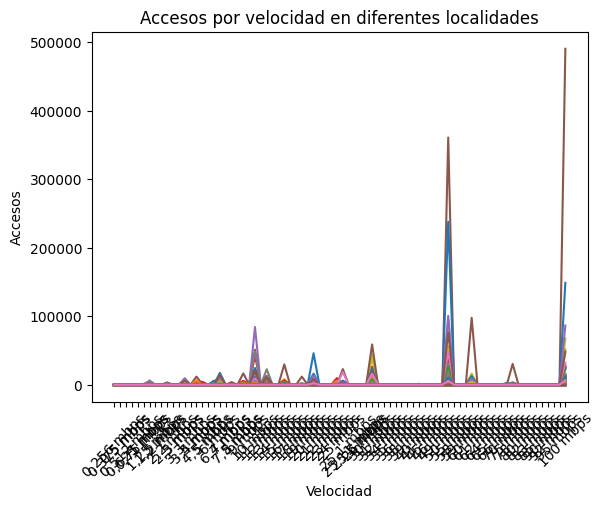

In [208]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Obtener las localidades y los datos de accesos para cada velocidad
localidades = df_acceso_internet_Velocidad_Localidad['Localidad'].unique()
columnas_velocidad = df_acceso_internet_Velocidad_Localidad.columns[4:-1]

# Crear las líneas para cada localidad
for localidad in localidades:
    datos_localidad = df_acceso_internet_Velocidad_Localidad.loc[df_acceso_internet_Velocidad_Localidad['Localidad'] == localidad, columnas_velocidad].values[0]
    ax.plot(columnas_velocidad, datos_localidad, label=localidad)

# Establecer etiquetas y título
ax.set_xlabel('Velocidad')
ax.set_ylabel('Accesos')
ax.set_title('Accesos por velocidad en diferentes localidades')
ax.set_xticklabels(columnas_velocidad, rotation=45)
# Ubicar la leyenda debajo del gráfico
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrar el gráfico
plt.show()

**Ahora buscamos la población total por localidad para hallar la Penetración de conecciones de + de 100Mbps por Localidad**

In [ ]:
#obtener los datos en formato csv conectividad al servicio de internet
url='http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/CONEC-AL-SERVI-DE-INTER/data.csv/?auth_key=TgShpivC0nHbaelNhLxxzE1swPyYbK2jyPar35hj'
response=requests.get(url)
if response.status_code == 200:
    with open('./Datasets/conectividad_internet.csv', 'wb') as file:
        file.write(response.content)
        print('Archivo guardado exitosamente.')

In [24]:
# Cargar el archivo CSV en un DataFrame
df_conectividad_internet = pd.read_csv('./Datasets/ConectividadalserviciodeInternet_2776151689333318979.csv',  encoding='utf-8')
df_conectividad_internet

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,CHACO,Quitilipi,Quitilipi,24517,SI,--,--,SI,--,SI,SI,SI,SI,22133010.0,"-26,8732071732978","-60,2185241226399"
4308,CHACO,Quitilipi,Villa El Palmar,879,--,--,--,--,--,SI,--,--,SI,22133020.0,"-26,4551186226266","-60,1646165913523"
4309,CHACO,San Fernando,Barranqueras,54698,SI,SI,--,SI,--,SI,SI,SI,SI,22140010.0,"-27,4877739289761","-58,9327416886365"
4310,CHACO,San Fernando,Basail,1929,SI,SI,--,--,SI,SI,SI,SI,SI,22140020.0,"-27,8868655966917","-59,2791003619491"


In [25]:
df_conectividad_internet.shape

(4312, 16)

In [26]:
df_conectividad_internet.dtypes

Provincia         object
Partido           object
Localidad         object
Poblacion          int64
ADSL              object
CABLEMODEM        object
DIALUP            object
FIBRAOPTICA       object
SATELITAL         object
WIRELESS          object
TELEFONIAFIJA     object
3G                object
4G                object
link             float64
Latitud           object
Longitud          object
dtype: object

In [27]:
#chequear nulos en la columna link y eliminarlos
df_conectividad_internet['link'].isna().sum() 
df_conectividad_internet.dropna(subset=['link'], inplace=True)
df_conectividad_internet['link'].isna().sum() 

0

In [28]:
df_conectividad_internet_filtrado = df_conectividad_internet[(df_conectividad_internet['Poblacion'] > 0)]
df_conectividad_internet_filtrado

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"
5,BUENOS AIRES,Balcarce,Ramos Otero,95,--,--,--,--,--,SI,--,--,SI,6063040.0,"-37,5426353712017","-58,3407185507274"
6,BUENOS AIRES,Balcarce,San Agustín,498,--,--,--,--,--,SI,SI,--,--,6063050.0,"-38,0122838564587","-58,355377761682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,CHACO,Quitilipi,Quitilipi,24517,SI,--,--,SI,--,SI,SI,SI,SI,22133010.0,"-26,8732071732978","-60,2185241226399"
4308,CHACO,Quitilipi,Villa El Palmar,879,--,--,--,--,--,SI,--,--,SI,22133020.0,"-26,4551186226266","-60,1646165913523"
4309,CHACO,San Fernando,Barranqueras,54698,SI,SI,--,SI,--,SI,SI,SI,SI,22140010.0,"-27,4877739289761","-58,9327416886365"
4310,CHACO,San Fernando,Basail,1929,SI,SI,--,--,SI,SI,SI,SI,SI,22140020.0,"-27,8868655966917","-59,2791003619491"


**Unimos los dos dataframe para obtener una única tabla con toda la información de conectividad por localidad y seguir nuestro análisis**
analizamos si la columna link es un identificador para realizar la unión

In [29]:
#cambiamos el tipo de dato de los indices para poder realizar un merge
#df_acceso_internet_Velocidad_Localidad['link'] = df_acceso_internet_Velocidad_Localidad['link'].astype(int)
df_conectividad_internet_filtrado['link'] = df_conectividad_internet_filtrado['link'].astype(int)

C:\Users\caro\AppData\Local\Temp\ipykernel_13992\3959062086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conectividad_internet_filtrado['link'] = df_conectividad_internet_filtrado['link'].astype(int)


In [30]:

# Identificar duplicados basados en todas las columnas
duplicados = df_conectividad_internet_filtrado['link'].duplicated()

# Imprimir las filas duplicadas
print(df_conectividad_internet_filtrado[duplicados])

         Provincia              Partido                   Localidad  \
37    BUENOS AIRES  Malvinas Argentinas                 Grand Bourg   
38    BUENOS AIRES  Malvinas Argentinas  Ingeniero Adolfo Sourdeaux   
40    BUENOS AIRES         San Fernando                    Victoria   
41    BUENOS AIRES         San Fernando                    Virreyes   
43    BUENOS AIRES           San Isidro                      Beccar   
...            ...                  ...                         ...   
4204  BUENOS AIRES           Avellaneda                       Wilde   
4224          CABA            COMUNA 13                       NUÑEZ   
4274          CABA            COMUNA 04                        BOCA   
4281          CABA            COMUNA 09           PARQUE AVELLANEDA   
4288          CABA            COMUNA 12            VILLA PUEYRREDON   

      Poblacion ADSL CABLEMODEM DIALUP FIBRAOPTICA SATELITAL WIRELESS  \
37        94441   SI         SI     --          SI        --       --   
3

In [31]:
df_conectividad_internet_filtrado.dtypes


Provincia        object
Partido          object
Localidad        object
Poblacion         int64
ADSL             object
CABLEMODEM       object
DIALUP           object
FIBRAOPTICA      object
SATELITAL        object
WIRELESS         object
TELEFONIAFIJA    object
3G               object
4G               object
link              int32
Latitud          object
Longitud         object
dtype: object

In [32]:
df_conectividad_internet_filtrado

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030,"-37,6254980210026","-58,7461862359423"
5,BUENOS AIRES,Balcarce,Ramos Otero,95,--,--,--,--,--,SI,--,--,SI,6063040,"-37,5426353712017","-58,3407185507274"
6,BUENOS AIRES,Balcarce,San Agustín,498,--,--,--,--,--,SI,SI,--,--,6063050,"-38,0122838564587","-58,355377761682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,CHACO,Quitilipi,Quitilipi,24517,SI,--,--,SI,--,SI,SI,SI,SI,22133010,"-26,8732071732978","-60,2185241226399"
4308,CHACO,Quitilipi,Villa El Palmar,879,--,--,--,--,--,SI,--,--,SI,22133020,"-26,4551186226266","-60,1646165913523"
4309,CHACO,San Fernando,Barranqueras,54698,SI,SI,--,SI,--,SI,SI,SI,SI,22140010,"-27,4877739289761","-58,9327416886365"
4310,CHACO,San Fernando,Basail,1929,SI,SI,--,--,SI,SI,SI,SI,SI,22140020,"-27,8868655966917","-59,2791003619491"


In [33]:
#eliminamos columnas link en ambpos dataframe - se deduce que la columna link no refiere a un identificador único por localidad. 
df_acceso_internet_Velocidad_Localidad.drop(columns='link', axis=0, inplace=True)
df_conectividad_internet_filtrado.drop(columns='link', axis=0, inplace=True)

C:\Users\caro\AppData\Local\Temp\ipykernel_13992\3392674502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conectividad_internet_filtrado.drop(columns='link', axis=0, inplace=True)


In [34]:
df_acceso_internet_Velocidad_Localidad.columns

Index(['Provincia', 'Partido', 'Localidad', '0,256 mbps', '0,375 mbps',
       '0,5 mbps', '0,512 mbps', '0,625 mbps', '0,75 mbps', '1 mbps',
       '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps', '2,5 mbps', '3 mbps',
       '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps', '5 mbps', '6 mbps',
       '6,4 mbps', '7 mbps', '7,5 mbps', '8 mbps', '9 mbps', '10 mbps',
       '11 mbps', '12 mbps', '13 mbps', '14 mbps', '15 mbps', '16 mbps',
       '17 mbps', '18 mbps', '19 mbps', '20 mbps', '21 mbps', '22 mbps',
       '23 mbps', '24 mbps', '25 mbps', '25,1 mbps', '25,11 mbps', '25,5 mbps',
       '26 mbps', '30 mbps', '31 mbps', '32 mbps', '34 mbps', '35 mbps',
       '36 mbps', '38 mbps', '39 mbps', '40 mbps', '41 mbps', '45 mbps',
       '46 mbps', '49 mbps', '50 mbps', '55 mbps', '58 mbps', '59 mbps',
       '60 mbps', '61 mbps', '62 mbps', '64 mbps', '65 mbps', '66 mbps',
       '70 mbps', '75 mbps', '78 mbps', '80 mbps', '82 mbps', '83 mbps',
       '85 mbps', '90 mbps', '92 mbps', '95 mb

In [35]:
#Eliminamos las columnas de velocidades menores a 100Mbps
columnas_a_mantener = ['Provincia', 'Partido', 'Localidad', '100 mbps', 'Total_Accesos']
df_acceso_internet_Velocidad_Localidad = df_acceso_internet_Velocidad_Localidad[columnas_a_mantener]

In [36]:
#Se define el merge por Provincia, Localidad y Partido
df_conectividad_acceso_internet_completo = pd.merge(df_acceso_internet_Velocidad_Localidad, df_conectividad_internet_filtrado, on=['Provincia', 'Localidad', 'Partido'], how='inner')
df_conectividad_acceso_internet_completo

,Provincia,Partido,Localidad,100 mbps,Total_Accesos,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0,6336,23408,SI,SI,--,--,SI,SI,SI,SI,SI,"-35,4339385892588","-60,1731209454056"
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0,58,280,--,--,--,--,--,--,SI,--,--,"-35,7392169542026","-60,5590634621789"
2,BUENOS AIRES,25 de Mayo,Del Valle,0,192,899,SI,--,--,--,SI,--,--,SI,SI,"-35,8973453887603","-60,7316089512944"
3,BUENOS AIRES,25 de Mayo,Ernestina,0,66,145,SI,--,--,--,--,--,--,--,--,"-35,2702340519789","-59,5575034078873"
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,181,547,--,--,--,--,--,SI,--,--,--,"-35,1643973648093","-60,0813577815069"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,TUCUMAN,Tafí Viejo,Tafí Viejo,3163,12897,39601,SI,SI,--,SI,--,SI,SI,SI,SI,"-26,7312682798666","-65,2558176904322"
2798,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,304,459,52960,--,SI,--,SI,--,--,SI,SI,SI,"-26,7759821127859","-65,2019701714422"
2799,TUCUMAN,Trancas,San Pedro de Colalao,0,313,3065,--,--,--,--,--,SI,SI,SI,SI,"-26,2357654346434","-65,4938515563214"
2800,TUCUMAN,Yerba Buena,Villa Carmela,0,1823,14728,SI,--,--,--,--,SI,SI,SI,SI,"-26,7677751896138","-65,2708444093707"


In [37]:
df_conectividad_acceso_internet_completo.columns

Index(['Provincia', 'Partido', 'Localidad', '100 mbps', 'Total_Accesos',
       'Poblacion', 'ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', 'SATELITAL',
       'WIRELESS', 'TELEFONIAFIJA', '3G', '4G', 'Latitud', 'Longitud'],
      dtype='object')

In [38]:
df_conectividad_acceso_internet_completo['Penetracion_Localidad_100Mbps'] = round(df_conectividad_acceso_internet_completo['100 mbps'] / df_conectividad_acceso_internet_completo['Poblacion']*100, 1)

In [39]:
df_conectividad_acceso_internet_completo

,Provincia,Partido,Localidad,100 mbps,Total_Accesos,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,Latitud,Longitud,Penetracion_Localidad_100Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0,6336,23408,SI,SI,--,--,SI,SI,SI,SI,SI,"-35,4339385892588","-60,1731209454056",0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0,58,280,--,--,--,--,--,--,SI,--,--,"-35,7392169542026","-60,5590634621789",0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,0,192,899,SI,--,--,--,SI,--,--,SI,SI,"-35,8973453887603","-60,7316089512944",0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,0,66,145,SI,--,--,--,--,--,--,--,--,"-35,2702340519789","-59,5575034078873",0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,181,547,--,--,--,--,--,SI,--,--,--,"-35,1643973648093","-60,0813577815069",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,TUCUMAN,Tafí Viejo,Tafí Viejo,3163,12897,39601,SI,SI,--,SI,--,SI,SI,SI,SI,"-26,7312682798666","-65,2558176904322",8.0
2798,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,304,459,52960,--,SI,--,SI,--,--,SI,SI,SI,"-26,7759821127859","-65,2019701714422",0.6
2799,TUCUMAN,Trancas,San Pedro de Colalao,0,313,3065,--,--,--,--,--,SI,SI,SI,SI,"-26,2357654346434","-65,4938515563214",0.0
2800,TUCUMAN,Yerba Buena,Villa Carmela,0,1823,14728,SI,--,--,--,--,SI,SI,SI,SI,"-26,7677751896138","-65,2708444093707",0.0


In [43]:
#Buscamos las provincias más pobladas y sus totales
# Agrupar por provincia y sumar la población, accesos de 100mbps, total_accesos
# Agrupar por provincia y realizar varias operaciones de agregación
df_agregado_por_provincias = df_conectividad_acceso_internet_completo.groupby('Provincia').agg({
    'Poblacion': 'sum',
    '100 mbps': 'sum',
    'Total_Accesos': 'sum'
}).reset_index()

# Renombrar las columnas
df_agregado_por_provincias = df_agregado_por_provincias.rename(columns={
    'Poblacion': 'Total_Poblacion',
    '100 mbps': 'Total_100mbps',
    'Total_Accesos': 'Total_Accesos'
})

# Mostrar el nuevo DataFrame
print(df_agregado_por_provincias)

              Provincia  Total_Poblacion  Total_100mbps  Total_Accesos
0          BUENOS AIRES         14486137         941187        4010719
1             CATAMARCA           312854          16201          64713
2                 CHACO           916828          29199         135866
3                CHUBUT           486229            425         145713
4               CORDOBA          3086908         242024         987555
5            CORRIENTES           844132          24343         133833
6            ENTRE RIOS          1102951          42947         243991
7               FORMOSA           451778           8634          66520
8                 JUJUY           611888           7848         117816
9              LA PAMPA           301615           2461         112952
10             LA RIOJA           315217          11975          85477
11              MENDOZA          1637942          16720         275093
12             MISIONES           795436          29116         156058
13    

In [47]:
#Calculamos la Penetración de 100Mbps por provincia y la agregamos al dataframe
#df_agregado_por_provincias['Penetracion_Provincia_100Mbps'] = round(df_agregado_por_provincias['Total_100mbps'] / df_agregado_por_provincias['Total_Poblacion']*100, 1)
df_agregado_por_provincias['Penetracion_Provincia_Total'] = round(df_agregado_por_provincias['Total_Accesos'] / df_agregado_por_provincias['Total_Poblacion']*100, 1)

# Mostrar el nuevo DataFrame
print(df_agregado_por_provincias)

              Provincia  Total_Poblacion  Total_100mbps  Total_Accesos  \
0          BUENOS AIRES         14486137         941187        4010719   
1             CATAMARCA           312854          16201          64713   
2                 CHACO           916828          29199         135866   
3                CHUBUT           486229            425         145713   
4               CORDOBA          3086908         242024         987555   
5            CORRIENTES           844132          24343         133833   
6            ENTRE RIOS          1102951          42947         243991   
7               FORMOSA           451778           8634          66520   
8                 JUJUY           611888           7848         117816   
9              LA PAMPA           301615           2461         112952   
10             LA RIOJA           315217          11975          85477   
11              MENDOZA          1637942          16720         275093   
12             MISIONES           7954

In [49]:
#ordenamos el dataframe para tomar las 5 provicias con mayor población para su posterior análisis.

# Ordenar las provincias por su población en orden descendente
df_poblacion_por_provincias_sorted = df_agregado_por_provincias.sort_values('Total_Poblacion', ascending=False)

# Tomar las 5 primeras provincias con mayor población
df_top_5_provincias = df_poblacion_por_provincias_sorted.head(5)

df_top_5_provincias

,Provincia,Total_Poblacion,Total_100mbps,Total_Accesos,Penetracion_Provincia_100Mbps,Penetracion_Provincia_Total
0,BUENOS AIRES,14486137,941187,4010719,6.5,27.7
4,CORDOBA,3086908,242024,987555,7.8,32.0
19,SANTA FE,3043422,164669,845099,5.4,27.8
11,MENDOZA,1637942,16720,275093,1.0,16.8
22,TUCUMAN,1170926,64152,255570,5.5,21.8


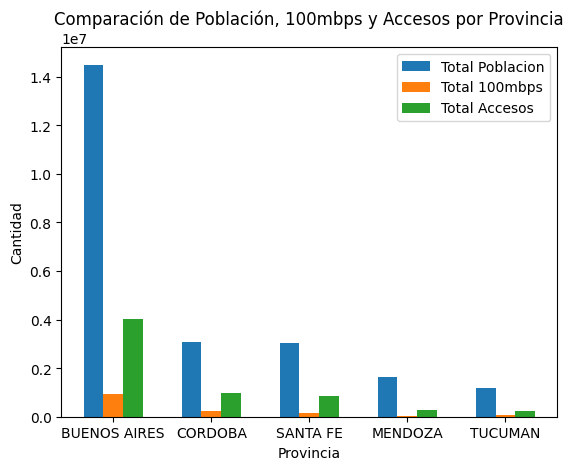

In [51]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Configurar los datos de las barras
x = df_top_5_provincias['Provincia']
y1 = df_top_5_provincias['Total_Poblacion']
y2 = df_top_5_provincias['Total_100mbps']
y3 = df_top_5_provincias['Total_Accesos']

# Configurar el ancho de las barras
bar_width = 0.2

# Configurar la posición de las barras
bar1_pos = range(len(df_top_5_provincias))
bar2_pos = [x + bar_width for x in bar1_pos]
bar3_pos = [x + bar_width*2 for x in bar1_pos]

# Crear las barras
ax.bar(bar1_pos, y1, width=bar_width, label='Total Poblacion')
ax.bar(bar2_pos, y2, width=bar_width, label='Total 100mbps')
ax.bar(bar3_pos, y3, width=bar_width, label='Total Accesos')

# Configurar las etiquetas del eje x
ax.set_xticks([x + bar_width for x in bar1_pos])
ax.set_xticklabels(df_top_5_provincias['Provincia'])

# Configurar las etiquetas y el título
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad')
ax.set_title('Comparación de Población, 100mbps y Accesos por Provincia')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

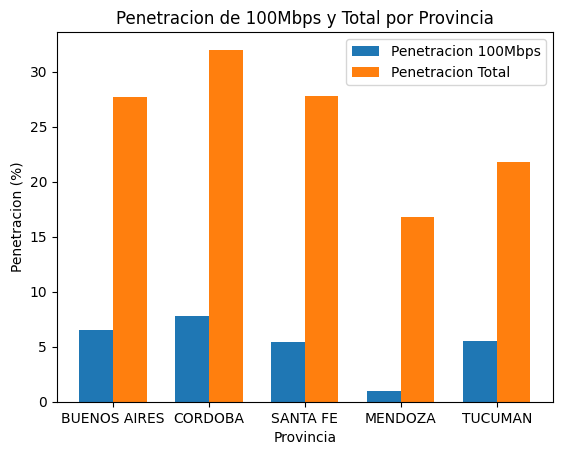

In [53]:
#graficamos la penetracion total y la penetrción de 100mbps
# Crear una figura y un eje
fig, ax = plt.subplots()

# Configurar los datos de las barras
x = df_top_5_provincias['Provincia']
y1 = df_top_5_provincias['Penetracion_Provincia_100Mbps']
y2 = df_top_5_provincias['Penetracion_Provincia_Total']

# Configurar el ancho de las barras
bar_width = 0.35

# Configurar la posición de las barras
bar1_pos = range(len(df_top_5_provincias))
bar2_pos = [x + bar_width for x in bar1_pos]

# Crear las barras
ax.bar(bar1_pos, y1, width=bar_width, label='Penetracion 100Mbps')
ax.bar(bar2_pos, y2, width=bar_width, label='Penetracion Total')

# Configurar las etiquetas del eje x
ax.set_xticks([x + bar_width/2 for x in bar1_pos])
ax.set_xticklabels(df_top_5_provincias['Provincia'])

# Configurar las etiquetas y el título
ax.set_xlabel('Provincia')
ax.set_ylabel('Penetracion (%)')
ax.set_title('Penetracion de 100Mbps y Total por Provincia')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

In [52]:
df_conectividad_acceso_internet_completo

,Provincia,Partido,Localidad,100 mbps,Total_Accesos,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,Latitud,Longitud,Penetracion_Localidad_100Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0,6336,23408,SI,SI,--,--,SI,SI,SI,SI,SI,"-35,4339385892588","-60,1731209454056",0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0,58,280,--,--,--,--,--,--,SI,--,--,"-35,7392169542026","-60,5590634621789",0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,0,192,899,SI,--,--,--,SI,--,--,SI,SI,"-35,8973453887603","-60,7316089512944",0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,0,66,145,SI,--,--,--,--,--,--,--,--,"-35,2702340519789","-59,5575034078873",0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0,181,547,--,--,--,--,--,SI,--,--,--,"-35,1643973648093","-60,0813577815069",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,TUCUMAN,Tafí Viejo,Tafí Viejo,3163,12897,39601,SI,SI,--,SI,--,SI,SI,SI,SI,"-26,7312682798666","-65,2558176904322",8.0
2798,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,304,459,52960,--,SI,--,SI,--,--,SI,SI,SI,"-26,7759821127859","-65,2019701714422",0.6
2799,TUCUMAN,Trancas,San Pedro de Colalao,0,313,3065,--,--,--,--,--,SI,SI,SI,SI,"-26,2357654346434","-65,4938515563214",0.0
2800,TUCUMAN,Yerba Buena,Villa Carmela,0,1823,14728,SI,--,--,--,--,SI,SI,SI,SI,"-26,7677751896138","-65,2708444093707",0.0


In [219]:
df_conectividad_acceso_internet_completo.columns


Index(['Provincia', 'Partido', 'Localidad', '100 mbps', 'Total_Accesos',
       'Poblacion', 'ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', 'SATELITAL',
       'WIRELESS', 'TELEFONIAFIJA', '3G', '4G', 'Latitud', 'Longitud',
       'Penetracion_Localidad_100Mbps'],
      dtype='object')

In [220]:
df_conectividad_acceso_internet_completo.dtypes

Provincia                         object
Partido                           object
Localidad                         object
100 mbps                           int32
Total_Accesos                      int32
Poblacion                          int64
ADSL                              object
CABLEMODEM                        object
DIALUP                            object
FIBRAOPTICA                       object
SATELITAL                         object
WIRELESS                          object
TELEFONIAFIJA                     object
3G                                object
4G                                object
Latitud                           object
Longitud                          object
Penetracion_Localidad_100Mbps    float64
dtype: object

In [231]:
df_conectividad_acceso_internet_completo.shape

(2802, 18)

# Realizar la conexion a un motor de base de datos MySQL

**Pasamos ambas tablas por localidad y por provincia a nuestro motor de base de datos MySQL**

In [55]:
import pymysql

**Establecer la conexion**

In [56]:
conexion = pymysql.connect(
host='127.0.0.1',
user='root', # nombre de usuario,
password='Yenny19741216') # contraseña de la BD

In [57]:
type(conexion)

pymysql.connections.Connection

In [58]:
cursor = conexion.cursor()

**crear la base de datos si no existe**

In [133]:
query_drop = 'drop database if exists henry_PI02'

In [134]:
cursor.execute(query_drop)

0

In [135]:
create_db = 'create database if not exists henry_PI02'

In [136]:
cursor.execute(create_db)

1

In [59]:
cursor.execute('use henry_PI02')

0

**crear la tabla de conectividad_acceso_internet por localidad**

In [237]:
query_drop_table = 'drop table if exists conectividad_acceso_internet'
cursor.execute(query_drop_table)

0

In [238]:
#crear la tabla
create_conectividad_acceso_internet = """
CREATE TABLE IF NOT EXISTS
conectividad_acceso_internet (
id INT NOT NULL AUTO_INCREMENT,
Provincia VARCHAR(100), 
Partido VARCHAR(100),
Localidad VARCHAR(100),
`100Mbps` int,
Total_Accesos int,
Poblacion  int, 
ADSL VARCHAR(2), 
CABLEMODEM VARCHAR(2), 
DIALUP VARCHAR(2), 
FIBRAOPTICA VARCHAR(2), 
SATELITAL VARCHAR(2),
WIRELESS VARCHAR(2),
TELEFONIAFIJA VARCHAR(2), 
`3G` VARCHAR(2), 
`4G` VARCHAR(2),
Latitud VARCHAR(20), 
Longitud VARCHAR(20),
Penetracion_Localidad_100Mbps float,
PRIMARY KEY (id)
)
"""

In [239]:
cursor.execute(create_conectividad_acceso_internet)

0

**insertar los registros de la tabla por localidad**

In [240]:
filas_internet = [tuple(df_conectividad_acceso_internet_completo.iloc[i].values)  for i in range(df_conectividad_acceso_internet_completo.shape[0])]

In [241]:
filas_internet

[('BUENOS AIRES',
  '25 de Mayo',
  '25 de Mayo',
  0,
  6336,
  23408,
  'SI',
  'SI',
  '--',
  '--',
  'SI',
  'SI',
  'SI',
  'SI',
  'SI',
  '-35,4339385892588',
  '-60,1731209454056',
  0.0),
 ('BUENOS AIRES',
  '25 de Mayo',
  'Agustín Mosconi',
  0,
  58,
  280,
  '--',
  '--',
  '--',
  '--',
  '--',
  '--',
  'SI',
  '--',
  '--',
  '-35,7392169542026',
  '-60,5590634621789',
  0.0),
 ('BUENOS AIRES',
  '25 de Mayo',
  'Del Valle',
  0,
  192,
  899,
  'SI',
  '--',
  '--',
  '--',
  'SI',
  '--',
  '--',
  'SI',
  'SI',
  '-35,8973453887603',
  '-60,7316089512944',
  0.0),
 ('BUENOS AIRES',
  '25 de Mayo',
  'Ernestina',
  0,
  66,
  145,
  'SI',
  '--',
  '--',
  '--',
  '--',
  '--',
  '--',
  '--',
  '--',
  '-35,2702340519789',
  '-59,5575034078873',
  0.0),
 ('BUENOS AIRES',
  '25 de Mayo',
  'Gobernador Ugarte',
  0,
  181,
  547,
  '--',
  '--',
  '--',
  '--',
  '--',
  'SI',
  '--',
  '--',
  '--',
  '-35,1643973648093',
  '-60,0813577815069',
  0.0),
 ('BUENOS AIRE

In [243]:
#insertar los datos
fill_internet = """
INSERT INTO conectividad_acceso_internet (Provincia, Partido, Localidad, 100Mbps, Total_Accesos, Poblacion, ADSL, CABLEMODEM, DIALUP, FIBRAOPTICA, SATELITAL, WIRELESS, TELEFONIAFIJA, 3G, 4G, Latitud, Longitud, Penetracion_Localidad_100Mbps)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

In [244]:
cursor.executemany(fill_internet,filas_internet)

2802

In [245]:
conexion.commit()

**crear la tabla de accesos totales por provincias**

In [60]:
query_drop_table = 'drop table if exists accesos_totales_provincias'
cursor.execute(query_drop_table)

0

In [54]:
df_agregado_por_provincias.columns

Index(['Provincia', 'Total_Poblacion', 'Total_100mbps', 'Total_Accesos',
       'Penetracion_Provincia_100Mbps', 'Penetracion_Provincia_Total'],
      dtype='object')

In [61]:
#crear la tabla
create_accesos_totales_porvincias = """
CREATE TABLE IF NOT EXISTS
acceso_totales_provincias (
id INT NOT NULL AUTO_INCREMENT,
Provincia VARCHAR(100), 
Total_Poblacion  int,
Total_100Mbps int,
Total_Accesos int,
Penetracion_Provincia_100Mbps float,
Penetracion_Provincia_Total float,
PRIMARY KEY (id)
)
"""

In [62]:
cursor.execute(create_accesos_totales_porvincias)

0

**insertar los registros de la tabla por provincias**

In [63]:
filas_provincias = [tuple(df_agregado_por_provincias.iloc[i].values)  for i in range(df_agregado_por_provincias.shape[0])]

In [64]:
filas_provincias

[('BUENOS AIRES', 14486137, 941187, 4010719, 6.5, 27.7),
 ('CATAMARCA', 312854, 16201, 64713, 5.2, 20.7),
 ('CHACO', 916828, 29199, 135866, 3.2, 14.8),
 ('CHUBUT', 486229, 425, 145713, 0.1, 30.0),
 ('CORDOBA', 3086908, 242024, 987555, 7.8, 32.0),
 ('CORRIENTES', 844132, 24343, 133833, 2.9, 15.9),
 ('ENTRE RIOS', 1102951, 42947, 243991, 3.9, 22.1),
 ('FORMOSA', 451778, 8634, 66520, 1.9, 14.7),
 ('JUJUY', 611888, 7848, 117816, 1.3, 19.3),
 ('LA PAMPA', 301615, 2461, 112952, 0.8, 37.4),
 ('LA RIOJA', 315217, 11975, 85477, 3.8, 27.1),
 ('MENDOZA', 1637942, 16720, 275093, 1.0, 16.8),
 ('MISIONES', 795436, 29116, 156058, 3.7, 19.6),
 ('NEUQUEN', 521307, 26170, 142669, 5.0, 27.4),
 ('RIO NEGRO', 580654, 15691, 133470, 2.7, 23.0),
 ('SALTA', 1100405, 32772, 192331, 3.0, 17.5),
 ('SAN JUAN', 621907, 400, 91366, 0.1, 14.7),
 ('SAN LUIS', 409796, 0, 103438, 0.0, 25.2),
 ('SANTA CRUZ', 266624, 150, 48863, 0.1, 18.3),
 ('SANTA FE', 3043422, 164669, 845099, 5.4, 27.8),
 ('SANTIAGO DEL ESTERO', 66168

In [69]:
#insertar los datos
fill_provincias = """
INSERT INTO acceso_totales_provincias (Provincia, Total_Poblacion, Total_100Mbps, Total_Accesos, Penetracion_Provincia_100Mbps, Penetracion_Provincia_Total)
VALUES (%s, %s, %s, %s, %s, %s)
"""

In [70]:
cursor.executemany(fill_provincias,filas_provincias)

23

In [71]:
#confirmar los cambios
conexion.commit()

In [72]:
# Cerrar el cursor y la conexión a MySQL
cursor.close()
conexion.close()

# Desde Power BI nos conectamos al servidor MySQL para obtener los datos y luego realizar el dashboard

**la ventaja de obtener los datos desde el servidor MySQL es que Power BI puede conectarse a una base de datos MySQL en tiempo real, lo que significa que los informes y paneles de control pueden actualizarse automáticamente a medida que se modifican los datos subyacentes en la base de datos. Esto permite tomar decisiones basadas en datos actualizados y en tiempo real.**